<a href="https://colab.research.google.com/github/mukul-anissh/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Iris.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/iris",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

<ipython-input-2-df63efffa778>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# using label encoder for the Species
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [7]:
# using standard scaler to standardize all numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = scaler.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [8]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.032057,-1.341272,-1.312977,0
1,2,-1.143017,-0.124958,-1.341272,-1.312977,0
2,3,-1.385353,0.337848,-1.398138,-1.312977,0
3,4,-1.506521,0.106445,-1.284407,-1.312977,0
4,5,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...,...
145,146,1.038005,-0.124958,0.819624,1.447956,2
146,147,0.553333,-1.281972,0.705893,0.922064,2
147,148,0.795669,-0.124958,0.819624,1.053537,2
148,149,0.432165,0.800654,0.933356,1.447956,2


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Id', 'Species'], axis=1), df['Species'], test_size=0.2, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [16]:
from sklearn.metrics import classification_report
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
# trying out different values of k
from sklearn.metrics import accuracy_score
accuracy = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))

In [19]:
accuracy

[0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667]

In [20]:
# the highest accuracy is obtained for k between 2 and 17
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

In [21]:
# using sepal length and petal width only to visualise decision boundaries
knn_visual = KNeighborsClassifier()
knn_visual.fit(df[['SepalLengthCm', 'PetalWidthCm']], df['Species'])

KNeighborsClassifier()

In [22]:
# creating a meshgrid to visualise contours
import numpy as np
x = np.arange(df['SepalLengthCm'].min(), df['SepalLengthCm'].max(), 0.01)
y = np.arange(df['PetalWidthCm'].min(), df['PetalWidthCm'].max(), 0.01)
xx, yy = np.meshgrid(x, y)

In [24]:
xx.shape

(316, 437)

In [25]:
yy.shape

(316, 437)

In [30]:
x_visual = np.array([xx.ravel(), yy.ravel()]).T
labels = knn_visual.predict(x_visual)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


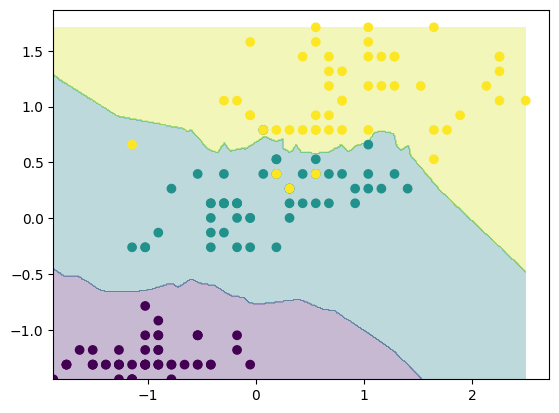

In [31]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha=0.3)
plt.scatter(df['SepalLengthCm'], df['PetalWidthCm'], c=df['Species'])
plt.show()